In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from koreanize_matplotlib import koreanize
koreanize()

In [2]:
df = pd.read_csv('./data/수산물_통합전처리_3컬럼.csv')
sites = ['여수', '제주도', '안흥', '군산', '통영']
df = df[df['산지'].isin(sites)]

# 산지 '여수', '제주도', '안흥', '군산', '통영' 기준으로 필터링한 df 와 해양데이터 합치기
sanji_df = pd.read_csv('./data/해양정보_추출/산지별_2021_2024_해양데이터.csv')    # 원본 해양데이터 데이터프레임
# year, month, 산지 기준으로 병합
merged_df = pd.merge(df, sanji_df, on=['year', 'month', '산지'], how='inner')


In [3]:
# 빈값 추출
merged_df.isna().sum()
# 결측치가 하나라도 있는 행을 삭제하고, 결과를 원본에 저장
merged_df.dropna(axis=0, how='any', inplace=True)

# 삭제 후 남은 데이터 개수 확인
merged_df.isna().sum()

어종       0
산지       0
규격       0
포장       0
수량       0
중량       0
낙찰고가     0
낙찰저가     0
평균가      0
파일어종     0
year     0
month    0
date     0
전처리      0
품목명      0
공통어종     0
기온 평균    0
수온 평균    0
풍속 평균    0
dtype: int64

In [5]:
print(merged_df.dtypes)

어종        object
산지        object
규격        object
포장        object
수량        object
중량       float64
낙찰고가      object
낙찰저가      object
평균가       object
파일어종      object
year       int64
month      int64
date      object
전처리       object
품목명       object
공통어종      object
기온 평균    float64
수온 평균    float64
풍속 평균    float64
dtype: object


In [6]:
# '수량', '낙찰고가', '낙찰저가', '평균가'를 int형으로 변환
cols_to_int = ['수량', '낙찰고가', '낙찰저가', '평균가']

for col in cols_to_int:
    # 쉼표 모두 제거 (문자열로 가정)
    merged_df[col] = merged_df[col].str.replace(',', '', regex=True)
    # 숫자형으로 변환(변환 불가면 NaN 처리)
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')
    # NaN은 0으로 대체 후 int형 변환
    merged_df[col] = merged_df[col].fillna(0).astype(int)

In [7]:
print(merged_df.dtypes)

어종        object
산지        object
규격        object
포장        object
수량         int64
중량       float64
낙찰고가       int64
낙찰저가       int64
평균가        int64
파일어종      object
year       int64
month      int64
date      object
전처리       object
품목명       object
공통어종      object
기온 평균    float64
수온 평균    float64
풍속 평균    float64
dtype: object


# 상관분석

## 전체 상관분석

In [8]:
corr = merged_df[['기온 평균', '수온 평균', '풍속 평균', '평균가', '중량', '수량']].corr()


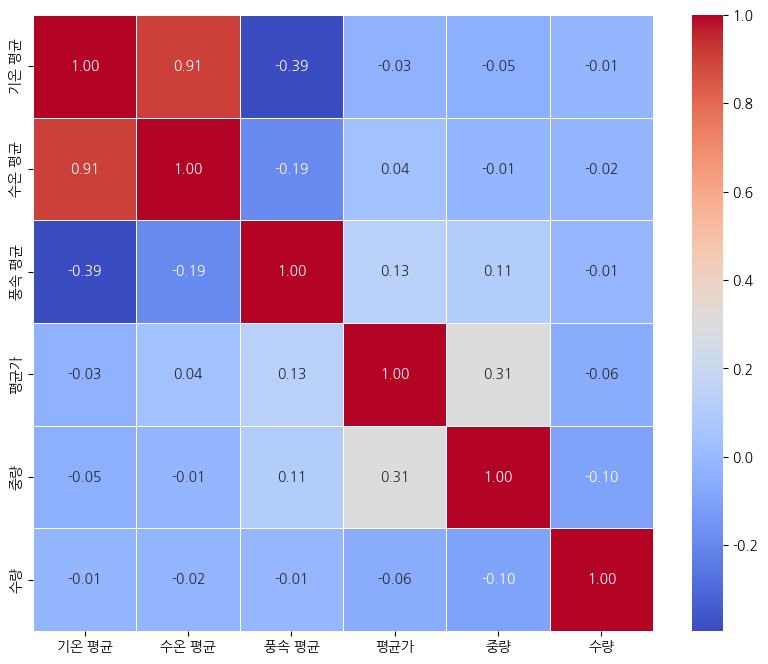

In [9]:

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

## 어종별 상관분석

In [27]:
grouped_corr = merged_df.groupby('공통어종')[['수온 평균', '평균가','중량']].corr()
grouped_corr = grouped_corr.dropna()
grouped_corr


수온 평균       평균가        중량
공통어종                                    
갈치   수온 평균  1.000000 -0.045321 -0.008155
     평균가   -0.045321  1.000000  0.156681
     중량    -0.008155  0.156681  1.000000
고등어  수온 평균  1.000000 -0.230791  0.077621
     평균가   -0.230791  1.000000  0.159952
     중량     0.077621  0.159952  1.000000
꽁치   수온 평균  1.000000 -0.085836  0.147900
     평균가   -0.085836  1.000000  0.418859
     중량     0.147900  0.418859  1.000000
넙치   수온 평균  1.000000 -0.019965 -0.047765
     평균가   -0.019965  1.000000  0.720168
     중량    -0.047765  0.720168  1.000000
대구   수온 평균  1.000000  0.095061  0.358850
     평균가    0.095061  1.000000  0.503570
     중량     0.358850  0.503570  1.000000
바지락  수온 평균  1.000000  0.073333  0.063168
     평균가    0.073333  1.000000  0.668329
     중량     0.063168  0.668329  1.000000
오징어  수온 평균  1.000000 -0.066304  0.016232
     평균가   -0.066304  1.000000  0.422065
     중량     0.016232  0.422065  1.000000
우럭   수온 평균  1.000000  0.148080  0.018996
     평균가    0.148080  1.000000  0.379631
     중량     0.018996  0.379631  1.000000
전복   수온 평균  1.000000 -0.270115 -0.129625
     평균가   -0.270115  1.000000  0.254963
     중량    -0.129625  0.254963  1.000000
조기   수온 평균  1.000000  0.041306  0.062845
     평균가    0.041306  1.000000  0.347664
     중량     0.062845  0.347664  1.000000
홍어   수온 평균  1.000000 -0.028371  0.017224
     평균가   -0.028371  1.000000  0.823865
     중량     0.017224  0.823865  1.000000

In [31]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import seaborn as sns
import matplotlib.pyplot as plt

# 어종 목록 생성 ('all' 선택지도 포함 가능)
species_list = merged_df['공통어종'].unique().tolist()

dropdown = widgets.Dropdown(options=species_list, description='어종 선택:')

output = widgets.Output()

def plot_heatmap(change):
    with output:
        clear_output(wait=True)
        species = change['new']
        if species:
            group_corr_matrices = merged_df.groupby('공통어종')[['수온 평균', '평균가', '중량']].corr()
            corr_matrix = group_corr_matrices.loc[species]
            
            plt.figure(figsize=(8,6))
            sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
            plt.title(f"{species} 상관행렬 히트맵")
            plt.show()

dropdown.observe(plot_heatmap, names='value')

display(dropdown, output)


Dropdown(description='어종 선택:', options=('갈치', '고등어', '우럭', '넙치', '가자미', '꽁치', '낙지', '대구', '바지락', '오징어', '전복', …

Output()

## 지역별 상관분석

In [29]:
sanji_corr = merged_df.groupby('산지')[['수온 평균', '평균가','중량']].corr()
sanji_corr = sanji_corr.dropna()
sanji_corr

수온 평균       평균가        중량
산지                                     
군산  수온 평균  1.000000 -0.017116  0.068053
    평균가   -0.017116  1.000000  0.479187
    중량     0.068053  0.479187  1.000000
안흥  수온 평균  1.000000  0.127385  0.188217
    평균가    0.127385  1.000000  0.406248
    중량     0.188217  0.406248  1.000000
여수  수온 평균  1.000000  0.010831  0.031351
    평균가    0.010831  1.000000  0.518703
    중량     0.031351  0.518703  1.000000
제주도 수온 평균  1.000000 -0.042083 -0.118166
    평균가   -0.042083  1.000000  0.305000
    중량    -0.118166  0.305000  1.000000
통영  수온 평균  1.000000  0.028447 -0.017649
    평균가    0.028447  1.000000  0.507454
    중량    -0.017649  0.507454  1.000000

In [34]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import seaborn as sns
import matplotlib.pyplot as plt

# 어종 목록 생성 ('all' 선택지도 포함 가능)
species_list = merged_df['산지'].unique().tolist()

dropdown = widgets.Dropdown(options=species_list, description='산지 선택:')

output = widgets.Output()

def plot_heatmap(change):
    with output:
        clear_output(wait=True)
        species = change['new']
        if species:
            group_corr_matrices = merged_df.groupby('산지')[['수온 평균', '평균가', '중량']].corr()
            corr_matrix = group_corr_matrices.loc[species]
            
            plt.figure(figsize=(8,6))
            sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
            plt.title(f"{species} 상관행렬 히트맵")
            plt.show()

dropdown.observe(plot_heatmap, names='value')

display(dropdown, output)


Dropdown(description='산지 선택:', options=('제주도', '통영', '군산', '안흥', '여수'), value='제주도')

Output()